#**Natural Language Processing for Sentiment Analysis on Stocks Data**

### **Import key libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### **Load the stock sentiment data**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
stock_df = pd.read_csv("/content/drive/MyDrive/03-Python-for-Data-Analysis-Pandas/Stock_sentiment.csv")
stock_df.head()

,Text,Sentiment
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1
2,user I'd be afraid to short AMZN - they are lo...,1
3,MNTA Over 12.00,1
4,OI Over 21.37,1


###**Exploratory data analysis (EDA)**

**Data frame Information**

In [4]:
stock_df.shape

(5791, 2)

In [5]:
stock_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5791 entries, 0 to 5790
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Text       5791 non-null   object
 1   Sentiment  5791 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 90.6+ KB


In [6]:
stock_df.describe()

,Sentiment
count,5791.000000
mean,0.636332
std,0.481096
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [7]:
stock_df["Text"].count()

5791

Create a new column called "text length" which is the number of words in the text column.

In [8]:
stock_df["Text length"] = stock_df["Text"].apply(len)
stock_df.head()

,Text,Sentiment,Text length
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1,95
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1,95
2,user I'd be afraid to short AMZN - they are lo...,1,114
3,MNTA Over 12.00,1,17
4,OI Over 21.37,1,16


Let's use groupby to use describe by label, this way we can begin to think about the features that separate positive and negative!

In [9]:
stock_df.groupby('Sentiment').describe().T

Sentiment                    0            1
Text length count  2106.000000  3685.000000
            mean     81.505223    76.794844
            std      38.697109    36.547817
            min       8.000000     6.000000
            25%      51.000000    46.000000
            50%      82.000000    78.000000
            75%     113.000000   103.000000
            max     150.000000   154.000000

In [10]:
stock_df.isnull().sum()

Text           0
Sentiment      0
Text length    0
dtype: int64

In [11]:
stock_df.duplicated().sum()

0

•	How many unique elements are present in the 'sentiment' column? Try to find out with two different methods

In [12]:
stock_df.nunique()

Text           5791
Sentiment         2
Text length     144
dtype: int64

In [13]:
len(stock_df['Sentiment'].unique())

2

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


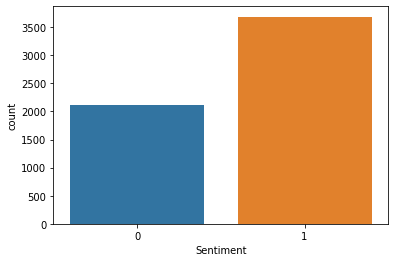

In [14]:
sns.countplot(stock_df['Sentiment']);

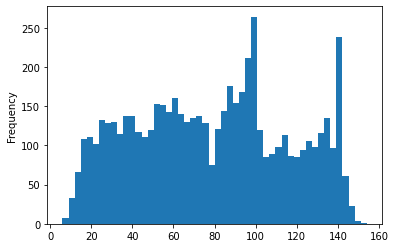

In [15]:
stock_df['Text length'].plot(bins=50, kind='hist');

Let's focus back on the idea of trying to see if message length is a distinguishing feature between positive and negative:



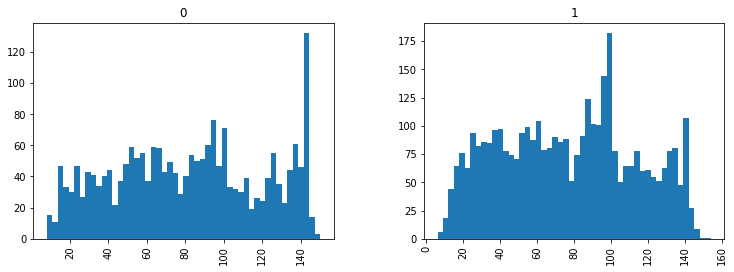

In [16]:
stock_df.hist(column='Text length', by='Sentiment', bins=50,figsize=(12,4));

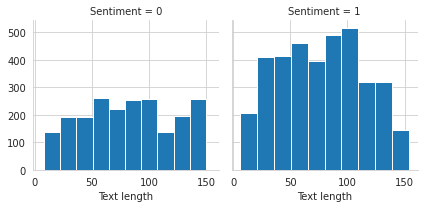

In [17]:
sns.set_style('whitegrid')
g = sns.FacetGrid(stock_df,col='Sentiment')
g.map(plt.hist,'Text length');

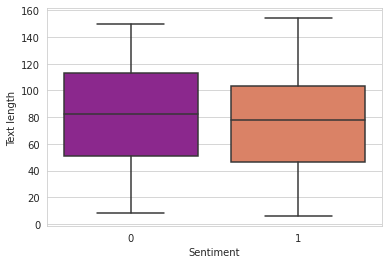

In [18]:
sns.boxplot(x='Sentiment',y='Text length',data= stock_df, palette='plasma');

Below, we further explore the data by label groups by creating a WordCloud. First, let’s create a separate dataframe for positive and negative sentiments and convert it to numpy array to generate WordCloud.

In [19]:
# Get all the positive and negative sentiments
positive_senti = stock_df[stock_df.Sentiment == 1]
negative_senti = stock_df[stock_df.Sentiment== 0]# Create numpy list to visualize using wordcloud
positive_senti_text = " ".join(positive_senti.Text.to_numpy().tolist())
negative_senti_text = " ".join(negative_senti.Text.to_numpy().tolist())

To visualize using WordCloud(), we extract words most commonly found in positive and negative sentiments, remove meaningless stop words such as “the”, “a” , “is” etc, and plot it. The WordCloud visualizes the most frequent words in the given text.

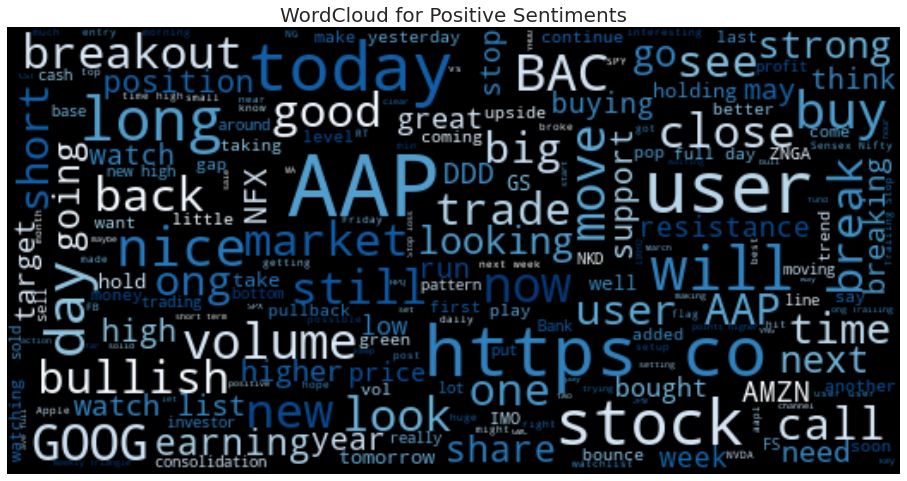

In [20]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
# wordcloud of positive sentiments
positive_senti_cloud = WordCloud(width =520, height =260, stopwords=STOPWORDS,max_font_size=50, background_color ="black", colormap='Blues').generate(positive_senti_text)
plt.figure(figsize=(16,10))
plt.imshow(positive_senti_cloud, interpolation='bilinear')
plt.axis('off') # turn off axis
plt.title("WordCloud for Positive Sentiments", fontsize = 20)

plt.show();

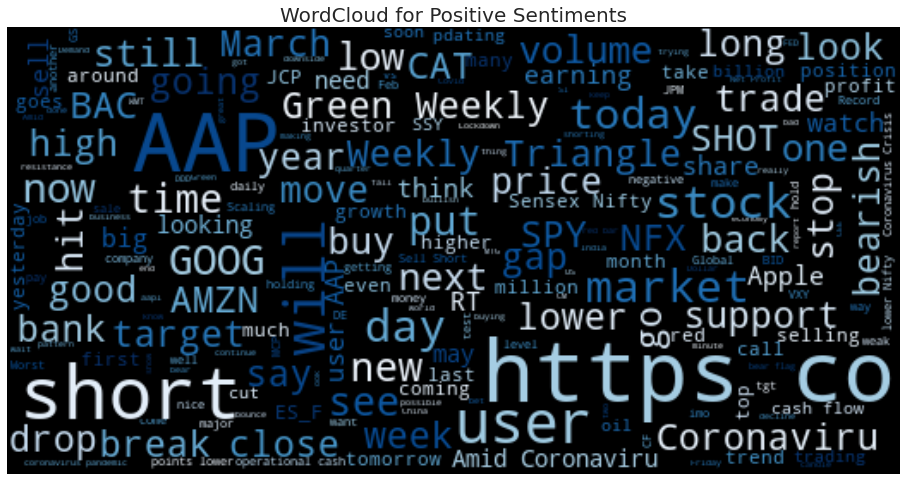

In [21]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
# wordcloud of negative sentiments
negative_senti_cloud = WordCloud(width =520, height =260, stopwords=STOPWORDS,max_font_size=50, background_color ="black", colormap='Blues').generate(negative_senti_text)
plt.figure(figsize=(16,10))
plt.imshow(negative_senti_cloud, interpolation='bilinear')
plt.axis('off') # turn off axis
plt.title("WordCloud for Positive Sentiments", fontsize = 20)

plt.show();

###**PERFORM DATA CLEANING**

Now let's begin to process the data so we can eventually use it with SciKit Learn!

####**Remove punctuations**

In [22]:
import string
string.punctuation
# Let's define a function to remove punctuations
def remove_punc(message):
    Test_punc_removed = [char for char in message if char not in string.punctuation]
    Test_punc_removed_join = ''.join(Test_punc_removed)

    return Test_punc_removed_join

In [23]:
# Let's remove punctuations from our dataset 
stock_df['Text Without Punctuation'] = stock_df['Text'].apply(remove_punc)
# Pandas.apply allow the users to pass a function and apply it on every single value of the Pandas series.
stock_df.head()

,Text,Sentiment,Text length,Text Without Punctuation
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1,95,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1,95,user AAP MOVIE 55 return for the FEAGEED indic...
2,user I'd be afraid to short AMZN - they are lo...,1,114,user Id be afraid to short AMZN they are look...
3,MNTA Over 12.00,1,17,MNTA Over 1200
4,OI Over 21.37,1,16,OI Over 2137


In [24]:
stock_df['Text'][2]

"user I'd be afraid to short AMZN - they are looking like a near-monopoly in eBooks and infrastructure-as-a-service"

In [25]:
stock_df['Text Without Punctuation'][2]

'user Id be afraid to short AMZN  they are looking like a nearmonopoly in eBooks and infrastructureasaservice'

###**PERFORM DATA CLEANING (REMOVE STOPWORDS)**



In [26]:
#install nltk
# NLTK: Natural Language tool kit
!pip install nltk
import nltk

In [27]:
# download stopwords
nltk.download("stopwords")
from nltk.corpus import stopwords
stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [28]:
# Obtain additional stopwords from nltk
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use','will','co','day','user','stock','today','week','year'])

In [29]:
import gensim
# Remove stopwords and remove short words (less than 2 characters)
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if len(token) >= 3 and token not in stop_words:
            result.append(token)
            
    return result

In [30]:
# apply pre-processing to the text column
stock_df['Text Without Punc & Stopwords'] = stock_df['Text Without Punctuation'].apply(preprocess)

In [31]:
stock_df['Text'][0]

'Kickers on my watchlist XIDE TIT SOQ PNK CPW BPZ AJ  trade method 1 or method 2, see prev posts'

In [32]:
stock_df['Text Without Punc & Stopwords'][0]

['kickers',
 'watchlist',
 'xide',
 'tit',
 'soq',
 'pnk',
 'cpw',
 'bpz',
 'trade',
 'method',
 'method',
 'see',
 'prev',
 'posts']

In [33]:
# join the words into a string
# stock_df['Processed Text 2'] = stock_df['Processed Text 2'].apply(lambda x: " ".join(x))

stock_df

,Text,Sentiment,Text length,Text Without Punctuation,Text Without Punc & Stopwords
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1,95,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,"[kickers, watchlist, xide, tit, soq, pnk, cpw,..."
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1,95,user AAP MOVIE 55 return for the FEAGEED indic...,"[aap, movie, return, feageed, indicator, trade..."
2,user I'd be afraid to short AMZN - they are lo...,1,114,user Id be afraid to short AMZN they are look...,"[afraid, short, amzn, looking, like, nearmonop..."
3,MNTA Over 12.00,1,17,MNTA Over 1200,[mnta]
4,OI Over 21.37,1,16,OI Over 2137,[]
...,...,...,...,...,...
5786,Industry body CII said #discoms are likely to ...,0,122,Industry body CII said discoms are likely to s...,"[industry, body, cii, said, discoms, likely, s..."
5787,"#Gold prices slip below Rs 46,000 as #investor...",0,123,Gold prices slip below Rs 46000 as investors b...,"[gold, prices, slip, investors, book, profits,..."
5788,Workers at Bajaj Auto have agreed to a 10% wag...,1,140,Workers at Bajaj Auto have agreed to a 10 wage...,"[workers, bajaj, auto, agreed, wage, cut, peri..."
5789,"#Sharemarket LIVE: Sensex off day’s high, up 6...",1,131,Sharemarket LIVE Sensex off day’s high up 600 ...,"[sharemarket, live, sensex, high, points, nift..."


###**PLOT WORDCLOUD**

In [34]:
# join the words into a string
stock_df['Text Without Punc & Stopwords Joined'] = stock_df['Text Without Punc & Stopwords'].apply(lambda x: " ".join(x))
stock_df.head()

,Text,Sentiment,Text length,Text Without Punctuation,Text Without Punc & Stopwords,Text Without Punc & Stopwords Joined
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1,95,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,"[kickers, watchlist, xide, tit, soq, pnk, cpw,...",kickers watchlist xide tit soq pnk cpw bpz tra...
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1,95,user AAP MOVIE 55 return for the FEAGEED indic...,"[aap, movie, return, feageed, indicator, trade...",aap movie return feageed indicator trades awesome
2,user I'd be afraid to short AMZN - they are lo...,1,114,user Id be afraid to short AMZN they are look...,"[afraid, short, amzn, looking, like, nearmonop...",afraid short amzn looking like nearmonopoly eb...
3,MNTA Over 12.00,1,17,MNTA Over 1200,[mnta],mnta
4,OI Over 21.37,1,16,OI Over 2137,[],


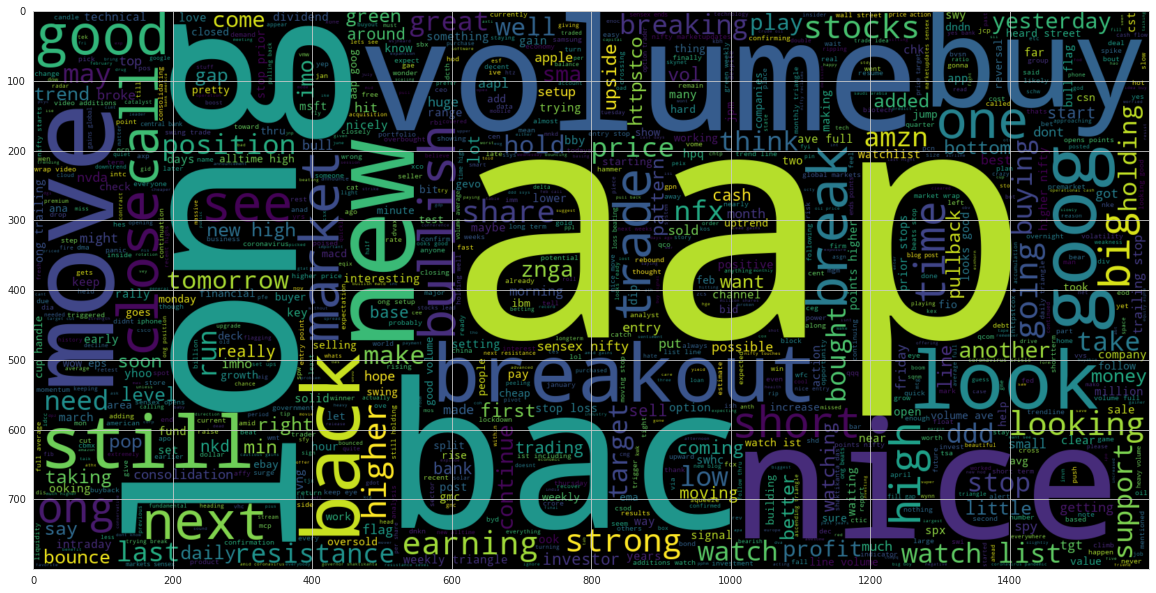

In [35]:
# plot the word cloud for text with positive sentiment
plt.figure(figsize = (20, 20)) 
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800).generate(" ".join(stock_df[stock_df['Sentiment'] == 1]['Text Without Punc & Stopwords Joined']))
plt.imshow(wc, interpolation = 'bilinear');

•	Visualize the wordcloud for tweets that have negative sentiment

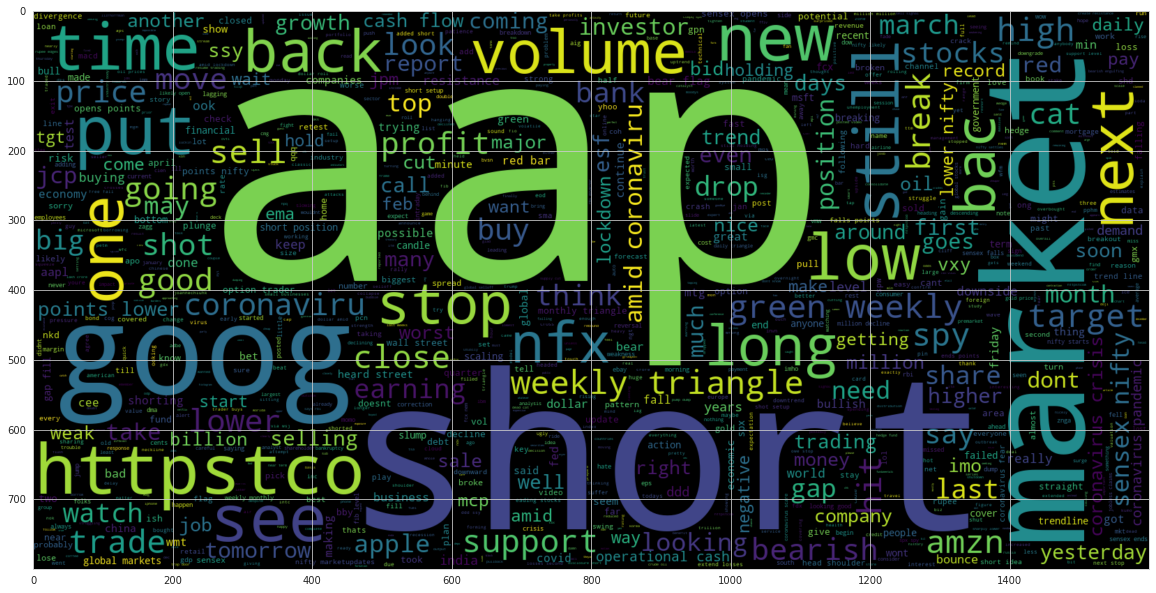

In [36]:
 # plot the word cloud for text with negative sentiment
plt.figure(figsize = (20, 20)) 
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800).generate(" ".join(stock_df[stock_df['Sentiment'] == 0]['Text Without Punc & Stopwords Joined']))
plt.imshow(wc, interpolation = 'bilinear');

###**Define a custom made CountVectorizer Analyzer**

In [37]:
# Natural Language Tool Kit
import nltk
import string
string.punctuation
# to remove stopword
# download stopwords
nltk.download("stopwords")
from nltk.corpus import stopwords

def text_process(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Now just remove any stopwords
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


###**Using Text Processing**

** Import CountVectorizer from sklearn.**

** Import TfidfTransformer from sklearn. **

** Import MultinomialNB from sklearn. **

** Import Pipeline from sklearn. **

** Then create a pipeline with the following steps:CountVectorizer(), TfidfTransformer(),MultinomialNB()**

###**Using the Pipeline**

Time to use the pipeline! Remember this pipeline has all your pre-process steps in it already, meaning we'll need to re-split the original data (Remember that we overwrote X as the CountVectorized version. What we need is just the text

###**Train Test Split**
Redo the train test split on the stock_df object.

Then fit the pipeline to the training data. Remember you can't use the same training data as last time because that data has already been vectorized. We need to pass in just the text and labels

In [38]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import  TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])
X = stock_df['Text']
y = stock_df['Sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=101)
# May take some time
pipeline.fit(X_train,y_train)
predictions = pipeline.predict(X_test)
from sklearn.metrics import confusion_matrix,classification_report
print('Confusion Matrix:' '\n', confusion_matrix(y_test,predictions))
print('\n', '\n','Classification Report:' '\n',classification_report(y_test,predictions))

Confusion Matrix:
 [[ 174  461]
 [  31 1072]]

 
 Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.27      0.41       635
           1       0.70      0.97      0.81      1103

    accuracy                           0.72      1738
   macro avg       0.77      0.62      0.61      1738
weighted avg       0.75      0.72      0.67      1738



**Applying Stemmer**


In [39]:
# Natural Language Tool Kit
import nltk
import string
string.punctuation
# to remove stopword
# download stopwords
nltk.download("stopwords")
from nltk.corpus import stopwords
# for Stemming propose
from nltk.stem.porter import PorterStemmer

def text_process(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # creating PorterStemmer object to
    # take main stem of each word
    ps = PorterStemmer()
     
          
    # Now just remove any stopwords
    return [ps.stem(word) for word in nopunc.split() if word.lower() not in stopwords.words('english')]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [40]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import  TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])
X = stock_df['Text']
y = stock_df['Sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=101)
# May take some time
pipeline.fit(X_train,y_train)
predictions = pipeline.predict(X_test)
from sklearn.metrics import confusion_matrix,classification_report
print('Confusion Matrix:' '\n', confusion_matrix(y_test,predictions))
print('\n', '\n','Classification Report:' '\n',classification_report(y_test,predictions))

Confusion Matrix:
 [[ 188  447]
 [  34 1069]]

 
 Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.30      0.44       635
           1       0.71      0.97      0.82      1103

    accuracy                           0.72      1738
   macro avg       0.78      0.63      0.63      1738
weighted avg       0.76      0.72      0.68      1738



F1 score of negative sentiment is ver bad compared to positive sentiment. The data is biased towards positive sentiment due to higher proportion of positives than negatives. Let's deal with this one. 

##**Natural Language Processing on Balanced Unbiased Data**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


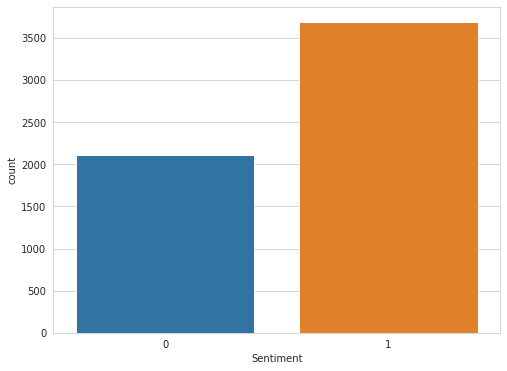

In [41]:
# we can observe imbalance data here 
plt.figure(figsize=(8,6))
sns.countplot(stock_df.Sentiment);

In [42]:
# Percentage of one star
(len(negative_senti)/len(positive_senti))*100 # 57.15%

57.1506105834464

In [43]:
# one way to fix it is to downsample the ham msg
positive_df = positive_senti.sample(n = len(negative_senti), random_state = 44)
negative_df = negative_senti
print(negative_df.shape, positive_df.shape)

(2106, 3) (2106, 3)


Below chart shows a similar distribution across message types after accounting for the imbalanced data.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


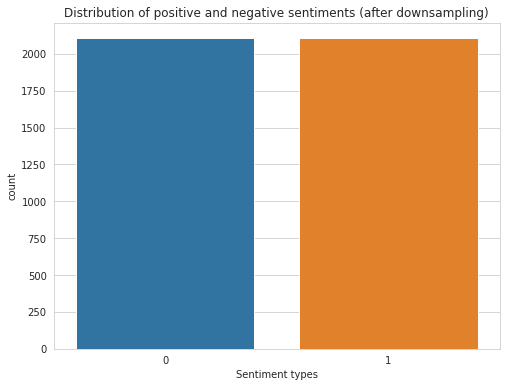

In [44]:
# Create a dataframe with these ham and spam msg
Sentiment_df = negative_df.append(positive_df).reset_index(drop=True)
plt.figure(figsize=(8,6))
sns.countplot(Sentiment_df.Sentiment)
plt.title('Distribution of positive and negative sentiments (after downsampling)')
plt.xlabel('Sentiment types');

**Feeding balanced unbiased data into the Pipeline**

In [45]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import  TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])
X = Sentiment_df['Text']
y = Sentiment_df['Sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=101)
# May take some time
pipeline.fit(X_train,y_train)
predictions = pipeline.predict(X_test)
from sklearn.metrics import confusion_matrix,classification_report
print('Confusion Matrix:' '\n', confusion_matrix(y_test,predictions))
print('\n', '\n','Classification Report:' '\n',classification_report(y_test,predictions))

Confusion Matrix:
 [[481 144]
 [168 471]]

 
 Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.77      0.76       625
           1       0.77      0.74      0.75       639

    accuracy                           0.75      1264
   macro avg       0.75      0.75      0.75      1264
weighted avg       0.75      0.75      0.75      1264



Eventhough the precision is affected, f1- score of negative sentiment is greatly improved. 